<img src='rain1.jpg'>

 <h1 style='background:#D3E0F8; border:0; color:black'><center>PREDICCION DE LLUVIA EN AUSTRALIA </center></h1> 
 
 
 En este trabajo vamos a responder a la pregunta de si lloverá o no mañana en Australia. Vamos a utilizar Python con Sckit-learn....
 Vamos a ver que tipo de nalisi nos predice mejor y 
 
 Para este proyecto vamos a utilizar un dataset...
 
 
 
 **About the data:**

The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations. 

In this project, I will use this data to predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainTomorrow", indicating whether or not it will rain the next day or not. 
 


 <h2 style='background:#D3E0F8; border:0; color:black'><center>Import data </center></h2>

## Importamos librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

## Cargar datos

In [4]:
data_rain = pd.read_csv("weatherAUS.csv")

 <h2 style='background:#D3E0F8; border:0; color:black'><center> Analizando los datos </center></h2>

## Analizar los datos

In [5]:
data_rain.shape

(145460, 23)

Podemos ver que en el dataset tenemos `23 columnas` y `145460 filas`


Ahora,vamos a ver que hay en las primeras y ultimas filas del dataset

In [87]:
data_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data_rain.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

información del dataset:

* El dataset incluye una mezcla de variables catégoricas y numéricas:
    * Datos numéricos tipo `float64`
    * Datos categóricos tipo `object`
* También incluye datos nulos (en la siguiente sección lo abordaremos)





In [3]:
data_rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


El comando  de arriba __describe()__ nos genera estadísticas descriptivas de nuestras variables numericas.

Este método calcula varios valores estadísticos para cada columna numérica del DataFrame.

- El número de observaciones (número de filas), 
- El valor medio, 
- La desviación estándar, 
- Los valores mínimo y máximo, 
- Los percentiles (25%, 50%, 75%) 
- Y la mediana (50%).

El comando __describe(include=['object'])__ nos generá las mismas estadísticas descriptivas pero de nuestras variables categóricas.






In [4]:
#data_rain.describe(include=['object']) --> otra manera de hacerlo
data_rain.describe(include=['O']) # include es para mostrar las variable categóricas

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


## Analizar mediante funciones pivotantes

Vamos a ver que correlación hay estre estas variables

In [11]:
data_rain[['Location', 'Rainfall']].groupby(['Location'], as_index=False).mean().sort_values(by='Rainfall', ascending=False)

,Location,Rainfall
8,Cairns,5.742035
13,Darwin,5.092452
11,CoffsHarbour,5.061497
14,GoldCoast,3.769396
47,Wollongong,3.594903
45,Williamtown,3.591108
39,Townsville,3.485592
26,NorahHead,3.387299
37,Sydney,3.324543
23,MountGinini,3.292260


In [6]:
data_rain[['RainTomorrow', 'Rainfall']].groupby(['RainTomorrow'], as_index=False).mean().sort_values(by='Rainfall',ascending = False)



,RainTomorrow,Rainfall
1,1.0,6.142104
0,0.0,1.270290


In [13]:
data_rain[['RainToday', 'Rainfall']].groupby(['RainToday'], as_index=False).mean().sort_values(by='Rainfall',ascending = False)

,RainToday,Rainfall
1,1.0,10.270354
0,0.0,0.075248


In [88]:
df.groupby('WindGustDir').mean()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
WindGustDir,,,,,,,,,,,,
E,14.037351,26.333010,1.890226,37.670188,14.413119,16.899138,64.492473,46.251423,1019.213773,1016.021882,19.402904,24.905872
ENE,14.571293,26.436429,1.883365,35.120434,12.818013,16.495915,66.407708,49.232847,1018.743938,1015.456988,19.902623,24.972399
ESE,13.614122,25.394648,2.280374,37.396907,13.942873,17.373130,65.629406,47.727690,1019.381644,1016.523688,18.745781,23.908872
N,10.848720,22.911311,1.451019,41.358961,15.655729,19.083978,68.940775,50.246254,1017.817926,1014.434277,15.931126,21.491516
NE,14.642727,25.898120,1.657098,35.698304,12.115969,17.839657,67.700467,53.091812,1018.574317,1015.143935,19.855431,24.390088
NNE,13.242262,24.813986,1.435661,37.588424,13.460101,18.184488,68.552852,53.153977,1018.339730,1014.737292,18.421729,23.270722
NNW,10.091014,22.223011,1.790456,40.562236,12.850416,18.564401,71.157371,51.325410,1016.567633,1013.370547,15.123418,20.760471
NW,10.429938,22.325539,2.248598,43.177912,13.512953,19.678298,69.988420,50.388222,1015.196670,1012.439894,15.502081,20.769462
S,12.407305,22.202669,3.207261,40.707134,15.227825,19.630917,70.890547,55.279599,1018.773102,1017.220112,16.559942,20.587231


## Analizamos nuestra target RainTomorrow



In [6]:
data_rain['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [7]:
data_rain['RainTomorrow'].nunique()

2

In [8]:
data_rain['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [9]:
data_rain['RainTomorrow'].isnull().sum()

3267

In [10]:
data_rain['RainTomorrow'].value_counts()/len(data_rain)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

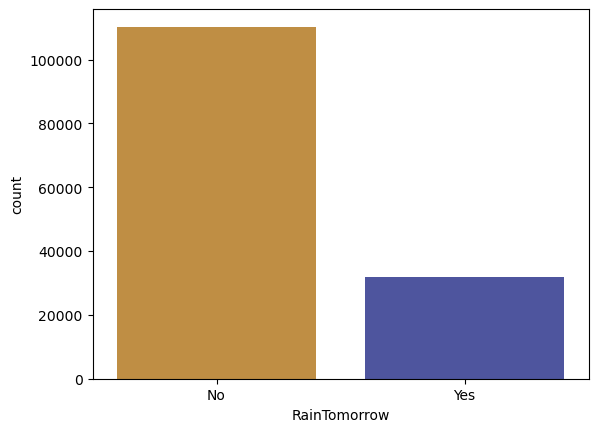

In [101]:

cols= ["#d4922f","#414aab"]
sns.countplot(x= data_rain["RainTomorrow"], palette= cols)



 __Analisi__

- La variable `RainTomorrow` tiene 2 valores.


- Estos dos valores son: `No`y `Si`.


- La gráfica de barras confirma:
    - Hay 110316 entradas de `No`
    - Hay 3267   entradas de `Si`
- Los dos valores aparecen:
    
    - `No` --> 75.8%
    - `Si` --> 21.9%


    

- También hay nulos:
    - `3267`


   


##   Missing values del dataset

In [19]:
missing_data = data_rain.isnull().sum().sort_values(ascending=False)

# Crear un dataframe con un objeto tipo Series

missing_data = pd.Series(missing_data, name='datos_perdidos')
missing_data = missing_data.to_frame()
missing_data.head(23)

,datos_perdidos
Sunshine,69835
Evaporation,62790
Cloud3pm,59358
Cloud9am,55888
Pressure9am,15065
Pressure3pm,15028
WindDir9am,10566
WindGustDir,10326
WindGustSpeed,10263
Humidity3pm,4507


In [20]:
# para saber cuantos datos no son null
datos_completos = data_rain.notnull().sum().sort_values(ascending=True)
datos_completos = pd.Series(datos_completos, name='datos_enteros')
datos_completos = datos_completos.to_frame()

# saber cuantos datos hay en cada columna y verlo en el dataframe
datos_total = [len(data_rain['Sunshine']),
         len(data_rain['Evaporation']),
         len(data_rain['Cloud3pm']),
         len(data_rain['Cloud9am']),
         len(data_rain['Pressure9am']),
         len(data_rain['Pressure3pm'])]


datos_total = pd.Series(datos_total, name='total',index=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Pressure9am','Pressure3pm'])
datos_total = datos_total.to_frame()

# visualizacion datos perdidos con el total
df= pd.concat([datos_total,datos_completos,missing_data],axis=1,join='inner')
df.sort_values('datos_perdidos', ascending= False)



,total,datos_enteros,datos_perdidos
Sunshine,145460,75625,69835
Evaporation,145460,82670,62790
Cloud3pm,145460,86102,59358
Cloud9am,145460,89572,55888
Pressure9am,145460,130395,15065
Pressure3pm,145460,130432,15028


##### Podemos ver que las 4 primeras filas,`Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm` tenemos mas del 40% nulos.

Tener tantos nulos en una columna puede ser problématico para los modelos de aprendizaje automático. Por eso empeorará el funcionamiento de nuestros algoritmos y afectará a la calidad y a su capacidad de hacer predicciones precisas.

Mas adelante borraremos `Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm`.

Los demas nulos que hay en el dataset, los rellenaremos para no perder más información.




<a id="4"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>DATA PREPROCESSING</center></h2> 
 
# DATA PREPROCESSING

**Steps involved in Data Preprocessing:**

* Label encoding columns with categorical data
* Perform the scaling of the features
* Detecting outliers
* Dropping the outliers based on data analysis

In [54]:
#Eliminamos las columnas `Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm`
data_rain = data_rain.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'], axis=1)
#df.info()

### Rellenamos los Null (missing values)

In [58]:
# Obtener una lista de las variables categóricas
lista_categoricas = (data_rain.dtypes == "object")
object_cols = list(lista_categoricas[lista_categoricas].index)

print("Variables Categoricas:")
print(object_cols)

Variables Categoricas:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


__Nuestras variables Categóricas__

- `Date`:  Fecha del dataset del cual vamos a cambiar el formato
- Tenemos 6 variables categoricas:, `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday`, `RainTomorrow`.
- `RainToday`, `RainTomorrow` son varibles binarias. Por lo tanto más adelante le cambiaremos el valor:
    - No --> 0
    - Si --> 1

In [57]:
# obtenemos la lista de las variables numéricas
num = (data_rain.dtypes == "float64")
num_cols = list(num[num].index)

# ver los missing values 
numeric_missing = data_rain[num_cols].isnull().sum().sort_values(ascending=False)
print('--- missing values ---\n',numeric_missing)

--- missing values ---
 Pressure9am      15065
Pressure3pm      15028
WindGustSpeed    10263
Humidity3pm       4507
Temp3pm           3609
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
dtype: int64


In [ ]:
for i in num_cols:
    data_rain[i].fillna(data_rain[i].median(), inplace=True)

In [ ]:
# Obtener una lista de las variables categóricas
lista_categoricas = (data_rain.dtypes == "object")
object_cols = list(lista_categoricas[lista_categoricas].index)

In [ ]:
for i in object_cols:
    data_rain[i].fillna(data_rain[i].mode()[0], inplace=True)

### Conversión de una característica categórica

In [53]:
# Obtener una lista de las variables categóricas
lista_categoricas = (data_rain.dtypes == "object")
object_cols = list(lista_categoricas[lista_categoricas].index)

print("Variables Categoricas:")
print(object_cols)

Variables Categoricas:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


__Nuestras variables Categóricas__

- `Date`:  Fecha del dataset del cual vamos a cambiar el formato
- Tenemos 6 variables categoricas:, `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday`, `RainTomorrow`.
- `RainToday`, `RainTomorrow` son varibles binarias. Por lo tanto vamos a cambiarles el valor:
    - No --> 0
    - Si --> 1

In [184]:
# Cambiamos el valor de estas columnas con valor (No/yes) por un valor binario (0/1)
data_rain['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data_rain["RainTomorrow"].replace({"No":0,"Yes":1},inplace = True)

In [159]:
data_rain['Date'].dtypes

KeyError: 'Date'

In [148]:
# pasamos la fecha de object a datetime para poderla estructurar mejor
data_rain['Date'] = pd.to_datetime(data_rain['Date'])

# Extraemos el año de la fecha
data_rain['Year'] = data_rain['Date'].dt.year


# Extraemos el mes de la fecha
data_rain['Month'] = data_rain['Date'].dt.month


# Extraemos el dia de la fecha
data_rain['Day'] = data_rain['Date'].dt.day

In [115]:
# Aplicamos en label encoder a cada columna categórica para cambiarla a numérica 
label_encoder = LabelEncoder()
for i in object_cols:
    data_rain[i] = label_encoder.fit_transform(data_rain[i])
    
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int64  
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [155]:
# borramos la columna date
data_rain = data_rain.drop('Date', axis=1)

In [161]:
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  RainToday      142199 non-null  float64
 17  RainTomorrow   142193 non-nul

 Podemos comprobar que hemos añadido tres columnas nuevas:
 `Year`
 `Month`
 `Day`
 
y se han borrado `Date`,`Sunshine`,`Evaporation`,`Cloud3pm`,`Cloud9am` del Dataset

In [1]:

print('Adios')

Adios
